In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import SGD

#input data
data = np.array([[39.5, 26.2, 32.8, 3.23, 7.5],
                [41.7, 27.4, 34.5, 2.76, 8.6],
                [48.7, 33.6, 41.1, 3.94, 4.3],
                [58.8, 42.9, 50.9, 3.55, 0.6],
                [68.4, 52.5, 60.5, 3.66, 0.0],
                [78.0, 62.4, 70.2, 3.85, 0.0],
                [83.6, 68.7, 76.1, 3.86, 0.0],
                [82.2, 67.8, 75.0, 4.11, 0.0],
                [75.8, 61.0, 68.4, 3.58, 0.0]])

#split data into training and testing sets
train_data = data[:-3]
test_data = data[-3:]

#define input and output data
X_train = train_data[:, :-1]
y_train = train_data[:, :]
X_test = test_data[:, :-1]
y_test = test_data[:, :]

#reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

#define RNN model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 4)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse')

#train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

#evaluate the model on testing data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

#make predictions for the next three months
next_three_months = np.array([[60.0, 40.0, 50.0, 3.0],
                              [55.0, 35.0, 45.0, 2.0],
                              [50.0, 30.0, 40.0, 1.5]])
next_three_months = next_three_months.reshape((next_three_months.shape[0], 1, next_three_months.shape[1]))
predictions = model.predict(next_three_months)
print(f'Predictions: {predictions}')


Epoch 1/100
6/6 [==============================] - 2s 9ms/step - loss: 1100.4683
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 980.8492
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 892.2232
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 799.2785
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 721.6975
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 656.5205
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 583.5933
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 509.4601
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 396.1665
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 305.0600
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 239.6506
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 194.1217
Epoch 13/100
6/6 [==================

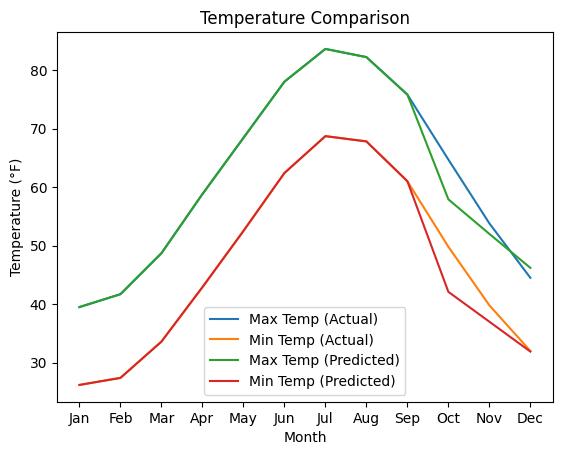

In [ ]:
import matplotlib.pyplot as plt

#data set 1
months1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
max_temps1 = [39.5, 41.7, 48.7, 58.8, 68.4, 78.0, 83.6, 82.2, 75.8, 64.7, 53.8, 44.5]
min_temps1 = [26.2, 27.4, 33.6, 42.9, 52.5, 62.4, 68.7, 67.8, 61.0, 49.8, 39.8, 32.0]

#data set 2
months2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
max_temps2 = [39.5, 41.7, 48.7, 58.8, 68.4, 78.0, 83.6, 82.2, 75.8, 57.9, 52.0, 46.2]
min_temps2 = [26.2, 27.4, 33.6, 42.9, 52.5, 62.4, 68.7, 67.8, 61.0, 42.1, 37.0, 31.9]

#plotting the graphs
plt.plot(months1, max_temps1, label='Max Temp (Actual)')
plt.plot(months1, min_temps1, label='Min Temp (Actual)')
plt.plot(months2, max_temps2, label='Max Temp (Predicted)')
plt.plot(months2, min_temps2, label='Min Temp (Predicted)')

#setting up the graph
plt.title('Temperature Comparison')
plt.xlabel('Month')
plt.ylabel('Temperature (°F)')
plt.legend()

#showing the graph
plt.show()


In [ ]:
import numpy as np

#actual values for the last 3 months
actual = np.array([[64.7,	49.8,	57.2,	3.72,	0.0],
                   [53.8,	39.8,	46.8,	3.07,	0.4],
                   [44.5,	32.0,	38.3,	3.96,	4.5]])

#predicted values for the last 3 months
predicted = np.array([[57.90508, 42.09353, 50.798912, 3.784316, 3.5431292],
                      [51.97031, 37.004276, 45.601154, 3.68085, 4.1304464],
                      [46.184666, 31.931398, 40.55095, 3.6145337, 4.7926836]])

#calculate mean squared error (MSE)
mse = np.mean((actual - predicted) ** 2)

#calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

#calculate mean absolute error (MAE)
mae = np.mean(np.abs(actual - predicted))

#calculate accuracy rate (AR)
ar = (1 - (mae / np.mean(actual))) * 100

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("AR: {:.2f}%".format(ar))


MSE: 12.94
RMSE: 3.60
MAE: 2.62
AR: 91.12%
